# 入门计算机视觉系列课程[3]-让机器学习起来

## 环境测试

In [79]:
import cv2
import numpy as np

In [80]:
a=[1,2,3]

In [81]:
print("Hello friends，welcome 明明老师的课程 22:12 .........",29*"-","%s"%(a))

Hello friends，welcome 明明老师的课程 22:12 ......... ----------------------------- [1, 2, 3]


## 模型学习好的样子

### 模型y = weights x feature  + bias

In [82]:
# 生成图片1 
image1 = np.array([[0,0,1,0,0],[0,1,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]])
# 生成图片0
image0 = np.array([[0,0,1,1,0],[0,1,0,0,1],[0,1,0,0,1],[0,1,0,0,1],[0,0,1,1,0]])
def get_feature(image):
    hist=np.array([0,0])
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i,j]]+=1
    hist= hist/image.size
    print(hist)
    return hist
fea0= get_feature(image0)
fea1= get_feature(image1)


[0.6 0.4]
[0.76 0.24]


In [84]:
weights=np.random.rand(1,2)
b = np.random.rand(1,1)
y0 = weights@fea0+b
print("模型对image0的判断结果y0=%s"%(y0[0]))
y1 = weights@fea1+b
print("模型对image1的判断结果y1=%s"%(y1[0]))
print("当 weights 和 b 有一组合适的值，使y0=0,y1=1时，模型就是训练好了")

模型对image0的判断结果y0=[1.66243831]
模型对image1的判断结果y1=[1.68604633]
当 weights 和 b 有一组合适的值，使y0=0,y1=1时，模型就是训练好了


In [ ]:
# 这个function实现了判断工程
# 通常我们叫它model

## 你早就知道如何让机器进行学习

In [33]:
# 如何找到合适的weights 和 bias值，时y0=0,y1=1
# 实际上就是解这样一个方程组
# weights * fea0 + bias = 0  方程[1]
# weights * fea1 + bias = 1  方程[2]
# 这里weights 和 bias是未知量

# 你看出来了：解方程组帮助模型找到了合适的weights值。
# 你早就会解方程组了对不对？
# 你早就知道如何让机器进行学习
# 其实你早就知道如何针对简单的问题进行建模，然后学习一个简单的模型。


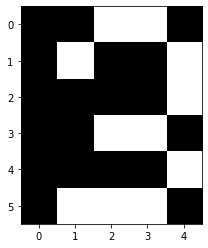

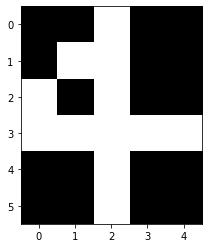

In [85]:
# 生成图片1 
image1 = np.array([[0,0,1,0,0],[0,1,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0]])
# 生成图片0
image0 = np.array([[0,0,1,1,0],[0,1,0,0,1],[0,1,0,0,1],[0,1,0,0,1],[0,0,1,1,0]])

# 生成图片3
image3 = np.array([[0,0,1,1,0],[0,1,0,0,1],[0,0,0,0,1],[0,0,1,1,0],[0,0,0,0,1],[0,1,1,1,0]])

# 生成图片4
image4 = np.array([[0,0,1,0,0],[0,1,1,0,0],[1,0,1,0,0],[1,1,1,1,1],[0,0,1,0,0],[0,0,1,0,0]])


import matplotlib.pyplot as plt
plt.imshow(image3,cmap="gray")
plt.show()
plt.imshow(image4,cmap="gray")
plt.show()


## 机器学习的本质

In [42]:
# 你看出来了：解方程组帮助模型找到了合适的weights值。
# 你早就会解方程组了对不对？
# 你早就知道如何让机器进行学习
# 其实你早就知道如何针对简单的问题进行建模，然后学习一个简单的模型。

# 机器学习的本质就是找到能够支持模型完成判断的那一组参数值
# 用何种办法找到这组参数值都行
# 简单的问题可以用解方程组的方法
# 复杂的问题可以用复杂一点的方法

## 把机器学习的过程转化为求最小值的过程

In [43]:
# 如果我们有4张图片，image0,image1,image2,image3
# 如果我们用解方程组的方法，我们需要解4个方程组

# 如果我们有N张图片，image0,image1,image2,,,,imageN
# 如果我们用解方程组的方法，我们需要解N个方程组

# 方程组数量太多了，无法解了，
# 这时候我们就可以把解方程组这个过程，转化为求最小值这个过程

# 对于image0 来说
# weights*fea+bias 是模型的输出，为了描述方便，我们定义这个值为 y^
# 0 是image0的类别，为了描述方便，我们定义这个值为 y*

# 我们希望 y^ 等于 y* 
# 我们希望 abs(y^ - y*) =0
# 我们希望 abs(y^ - y*) 尽量小
# 我们希望 (y^ - y*)^2 尽量小


# 所以，只要我们找到一组合适的weights 和 bias ,使(y^- y*)^2取得到最小值0,
# 就相当于模型完成学习了

# 所以我们用各种最优化方法来最小化(y^-y*)^2
# 把y^ 和 y*本来的值代入进去：
# (weights*fea + bias - 0)^2
# fea 是已知的

# 我们定义(y^-y*)^2为目标函数，loss函数




## 梯度下降算法实现机器的学习

In [ ]:
# 1 初始化：给未知量初始值
# 2 计算loss,loss=(y^-y*)^2
# 3 计算loss对weights 和 bias的梯度 Dweights 和Dbias
# 4 利用weights -= learning_rate*Dweghts,bias -= learning_rate* Dbias来更新weights和bias的值
# 5 回到2 

### 初始化

In [44]:
# 初始化
weights=np.random.rand(1,2)
b = np.random.rand(1,1)
y0 = weights@fea0+b
print("模型对image0的判断结果y0=%s"%(y0[0]))
y1 = weights@fea1+b
print("模型对image1的判断结果y1=%s"%(y1[0]))
print("当 weights 和 b 有一组合适的值，使y0=0,y1=1时，模型就是训练好了")

模型对image0的判断结果y0=[1.36478569]
模型对image1的判断结果y1=[1.36871205]
当 weights 和 b 有一组合适的值，使y0=0,y1=1时，模型就是训练好了


### 计算loss

In [46]:
y0 = weights@fea0+b
print("模型对image0的判断结果y0=%s"%(y0[0]))
y1 = weights@fea1+b
print("模型对image1的判断结果y1=%s"%(y1[0]))
loss = (y0-0)**2+ (y1-0)**2
print("loss=%s"%(loss))

模型对image0的判断结果y0=[1.36478569]
模型对image1的判断结果y1=[1.36871205]
loss=[[3.73601268]]


### 计算梯度

In [ ]:

# Dweights = 2*(y0-0)*fea0 + 2*(y1-1)*fea1
# Dbias = 2*(y0-1) + 2*(y1-1)

In [47]:
Dweights = 2*(y0-0)*fea0 + 2*(y1-1)*fea1
Dbias = 2*(y0-1) + 2*(y1-1)
print("Dweights=%s"%(Dweights))
print("Dbias=%s"%(Dbias))

Dweights=[[2.19818515 1.26881034]]
Dbias=[[1.4669955]]


### 更新weights,bias

In [50]:
weights -= Dweights * 0.001
b -= Dbias * 0.001
print("weigths=%s"%(weights))
print("bias=%s"%(b))

weigths=[[0.87240478 0.85065317]]
bias=[[0.49266826]]


### 计算loss

In [58]:
y0 = weights@fea0+b
print("模型对image0的判断结果y0=%s"%(y0[0]))
y1 = weights@fea1+b
print("模型对image1的判断结果y1=%s"%(y1[0]))
loss = (y0-0)**2+ (y1-0)**2
print("loss=%s,loss在变小"%(loss))

模型对image0的判断结果y0=[1.35313204]
模型对image1的判断结果y1=[1.35646561]
loss=[[3.67096529]],loss在变小


### 计算梯度

In [60]:
Dweights = 2*(y0-0)*fea0 + 2*(y1-1)*fea1
Dbias = 2*(y0-1) + 2*(y1-1)
print("Dweights=%s"%(Dweights))
print("Dbias=%s"%(Dbias))

Dweights=[[2.16558619 1.25360913]]
Dbias=[[1.41919532]]


### 更新weights,bias

In [62]:
weights -= Dweights * 0.001
b -= Dbias * 0.001
print("weigths=%s"%(weights))
print("bias=%s"%(b))

weigths=[[0.86806457 0.84814173]]
bias=[[0.48981662]]


### 计算loss

In [64]:
y0 = weights@fea0+b
print("模型对image0的判断结果y0=%s"%(y0[0]))
y1 = weights@fea1+b
print("模型对image1的判断结果y1=%s"%(y1[0]))
loss = (y0-0)**2+ (y1-0)**2
print("loss=%s,loss在变小"%(loss))

模型对image0的判断结果y0=[1.34991205]
模型对image1的判断结果y1=[1.35309971]
loss=[[3.65314137]],loss在变小


### 计算梯度

In [66]:
Dweights = 2*(y0-0)*fea0 + 2*(y1-1)*fea1
Dbias = 2*(y0-1) + 2*(y1-1)
print("Dweights=%s"%(Dweights))
print("Dbias=%s"%(Dbias))

Dweights=[[2.15660602 1.2494175 ]]
Dbias=[[1.40602352]]


### 更新weights,bias

In [70]:
weights -= Dweights * 0.001
b -= Dbias * 0.001
print("weigths=%s"%(weights))
print("bias=%s"%(b))

weigths=[[0.86375136 0.84564289]]
bias=[[0.48700457]]


### 计算loss

In [72]:
y0 = weights@fea0+b
print("模型对image0的判断结果y0=%s"%(y0[0]))
y1 = weights@fea1+b
print("模型对image1的判断结果y1=%s"%(y1[0]))
loss = (y0-0)**2+ (y1-0)**2
print("loss=%s,loss在变小"%(loss))

模型对image0的判断结果y0=[1.34351254]
模型对image1的判断结果y1=[1.3464099]
loss=[[3.61784557]],loss在变小


### 计算梯度

In [53]:
Dweights = 2*(y0-0)*fea0 + 2*(y1-1)*fea1
Dbias = 2*(y0-1) + 2*(y1-1)
print("Dweights=%s"%(Dweights))
print("Dbias=%s"%(Dbias))

Dweights=[[2.17462292 1.25782719]]
Dbias=[[1.43245011]]


### 更新weights,bias

In [54]:
weights -= Dweights * 0.001
b -= Dbias * 0.001
print("weigths=%s"%(weights))
print("bias=%s"%(b))

weigths=[[0.87023016 0.84939534]]
bias=[[0.49123581]]
